# Job Placement Dataset

Source: https://www.kaggle.com/datasets/ahsan81/job-placement-dataset

This file contains different attribute of the candidates educational history and work experience. The detailed data dictionary is given below:

Data Dictionary
gender : Gender of the candidate  
ssc_percentage : Senior secondary exams percentage (10th Grade)  
ssc_board : Board of education for ssc exams  
hsc_percentage : Higher secondary exams percentage (12th Grade)  
hsc_borad : Board of education for hsc exams  
hsc_subject : Subject of study for hsc  
degree_percentage : Percentage of marks in undergrad degree  
undergrad_degree : Undergrad degree majors  
work_experience : Past work experience  
emp_test_percentage : Aptitude test percentage  
specialization : Postgrad degree majors - (MBA specialization)  
mba_percent : Percentage of marks in MBA degree  
status (TARGET) : Status of placement. Placed / Not Placed

In [77]:
import matplotlib as plt
import numpy as np
import pandas as pd
import researchpy as rp
import scipy.stats as stats
import sklearn as sk

from sklearn import linear_model
from sklearn import metrics

## Data Exploration

In [28]:
data = pd.read_csv('Job_Placement_Data.csv')

data.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


### Numeric Predictors

In [29]:
data.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


A likelihood ratio test function from http://rnowling.github.io/machine/learning/2017/10/07/likelihood-ratio-test.html:

In [78]:
def likelihood_ratio_test(features_alternate, labels, lr_model, features_null=None):
    """
    Compute the likelihood ratio test for a model trained on the set of features in
    `features_alternate` vs a null model.  If `features_null` is not defined, then
    the null model simply uses the intercept (class probabilities).  Note that
    `features_null` must be a subset of `features_alternative` -- it can not contain
    features that are not in `features_alternate`.
    Returns the p-value, which can be used to accept or reject the null hypothesis.
    """
    labels = np.array(labels)
    features_alternate = np.array(features_alternate)
    
    if features_null:
        features_null = np.array(features_null)
        
        if features_null.shape[1] >= features_alternate.shape[1]:
            raise (ValueError, "Alternate features must have more features than null features")
        
        lr_model.fit(features_null, labels)
        null_prob = lr_model.predict_proba(features_null)[:, 1]
        df = features_alternate.shape[1] - features_null.shape[1]
    else:
        null_prob = sum(labels) / float(labels.shape[0]) * \
                    np.ones(labels.shape)
        df = features_alternate.shape[1]
    
    lr_model.fit(features_alternate, labels)
    alt_prob = lr_model.predict_proba(features_alternate)

    alt_log_likelihood = -sk.metrics.log_loss(labels,
                                   alt_prob,
                                   normalize=False)
    null_log_likelihood = -sk.metrics.log_loss(labels,
                                    null_prob,
                                    normalize=False)

    G = 2 * (alt_log_likelihood - null_log_likelihood)
    p_value = stats.chi2.sf(G, df)

    return p_value

8.939383353715161e-23

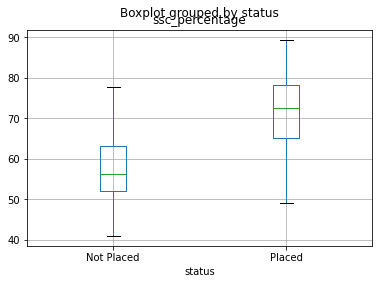

In [84]:
data.boxplot('ssc_percentage', by = 'status')

logFit = sk.linear_model.LogisticRegression().fit(np.array(data['ssc_percentage']).reshape(-1, 1), data['status'])

likelihood_ratio_test(np.array(data['ssc_percentage']).reshape(-1, 1), (data['status'] == 'Placed').astype(int), logFit)

2.2508006047868448e-15

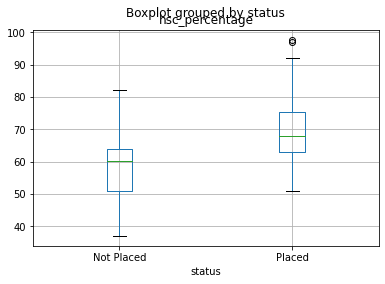

In [85]:
data.boxplot('hsc_percentage', by = 'status')

logFit = sk.linear_model.LogisticRegression().fit(np.array(data['hsc_percentage']).reshape(-1, 1), data['status'])

likelihood_ratio_test(np.array(data['hsc_percentage']).reshape(-1, 1), (data['status'] == 'Placed').astype(int), logFit)

2.044428524054884e-14

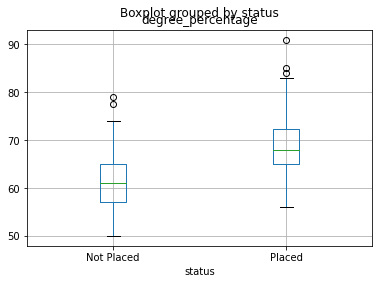

In [86]:
data.boxplot('degree_percentage', by = 'status')

logFit = sk.linear_model.LogisticRegression().fit(np.array(data['degree_percentage']).reshape(-1, 1), data['status'])

likelihood_ratio_test(np.array(data['degree_percentage']).reshape(-1, 1), (data['status'] == 'Placed').astype(int), logFit)

0.05918182852278074

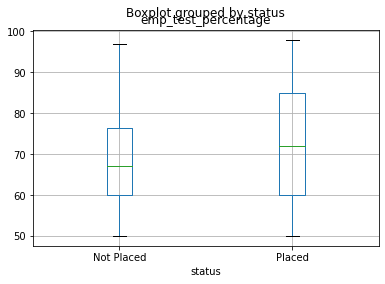

In [87]:
data.boxplot('emp_test_percentage', by = 'status')

logFit = sk.linear_model.LogisticRegression().fit(np.array(data['emp_test_percentage']).reshape(-1, 1), data['status'])

likelihood_ratio_test(np.array(data['emp_test_percentage']).reshape(-1, 1), (data['status'] == 'Placed').astype(int), logFit)

0.257167121513069

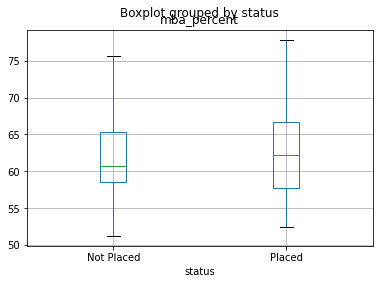

In [88]:
data.boxplot('mba_percent', by = 'status')

logFit = sk.linear_model.LogisticRegression().fit(np.array(data['mba_percent']).reshape(-1, 1), data['status'])

likelihood_ratio_test(np.array(data['mba_percent']).reshape(-1, 1), (data['status'] == 'Placed').astype(int), logFit)

### Categorical Predictors

In [47]:
rp.summary_cat(data[['gender', 'ssc_board', 'hsc_board', 'hsc_subject', 'undergrad_degree', 'work_experience', 'specialisation', 'status']])

,Variable,Outcome,Count,Percent
0,gender,M,139,64.65
1,,F,76,35.35
2,ssc_board,Central,116,53.95
3,,Others,99,46.05
4,hsc_board,Others,131,60.93
5,,Central,84,39.07
6,hsc_subject,Commerce,113,52.56
7,,Science,91,42.33
8,,Arts,11,5.12
9,undergrad_degree,Comm&Mgmt,145,67.44


In [48]:
contingency = pd.crosstab(data['status'], data['gender'])

display(contingency)

stats.chi2_contingency(contingency)

gender,F,M
status,,
Not Placed,28,39
Placed,48,100


(1.3817539668505106,
 0.23980260881037568,
 1,
 array([[23.68372093, 43.31627907],
        [52.31627907, 95.68372093]]))

In [49]:
contingency = pd.crosstab(data['status'], data['ssc_board'])

display(contingency)

stats.chi2_contingency(contingency)

ssc_board,Central,Others
status,,
Not Placed,38,29
Placed,78,70


(0.15933127499487468,
 0.6897729431530739,
 1,
 array([[36.14883721, 30.85116279],
        [79.85116279, 68.14883721]]))

In [50]:
contingency = pd.crosstab(data['status'], data['hsc_board'])

display(contingency)

stats.chi2_contingency(contingency)

hsc_board,Central,Others
status,,
Not Placed,27,40
Placed,57,91


(0.009517458006762429,
 0.9222837052885,
 1,
 array([[26.17674419, 40.82325581],
        [57.82325581, 90.17674419]]))

In [51]:
contingency = pd.crosstab(data['status'], data['hsc_subject'])

display(contingency)

stats.chi2_contingency(contingency)

hsc_subject,Arts,Commerce,Science
status,,,
Not Placed,5,34,28
Placed,6,79,63


(1.1147451327084137,
 0.5727118511343621,
 2,
 array([[ 3.42790698, 35.21395349, 28.35813953],
        [ 7.57209302, 77.78604651, 62.64186047]]))

In [52]:
contingency = pd.crosstab(data['status'], data['undergrad_degree'])

display(contingency)

stats.chi2_contingency(contingency)

undergrad_degree,Comm&Mgmt,Others,Sci&Tech
status,,,
Not Placed,43,6,18
Placed,102,5,41


(2.9690428771222925,
 0.22661076190356658,
 2,
 array([[45.18604651,  3.42790698, 18.38604651],
        [99.81395349,  7.57209302, 40.61395349]]))

In [53]:
contingency = pd.crosstab(data['status'], data['work_experience'])

display(contingency)

stats.chi2_contingency(contingency)

work_experience,No,Yes
status,,
Not Placed,57,10
Placed,84,64


(15.154425347637423,
 9.906584720516494e-05,
 1,
 array([[43.93953488, 23.06046512],
        [97.06046512, 50.93953488]]))

In [54]:
contingency = pd.crosstab(data['status'], data['specialisation'])

display(contingency)

stats.chi2_contingency(contingency)

specialisation,Mkt&Fin,Mkt&HR
status,,
Not Placed,25,42
Placed,95,53


(12.440229009203623,
 0.00042018425858864284,
 1,
 array([[37.39534884, 29.60465116],
        [82.60465116, 65.39534884]]))